# 1. Import libraries


In [ ]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# 2. Load data


In [13]:
results_path = "results.json"
with open(results_path, "r") as f:
    results = json.load(f)


# 3. Data processing


In [14]:
headers = results["results"]["table"]["head"]["prompts"]

In [21]:
extracted_data = []
for item in headers:
    provider = item["provider"]
    test_pass_count = item['metrics']['testPassCount']
    test_fail_count = item['metrics']['testFailCount']
    total_test = test_pass_count + test_fail_count
    average_latency = item['metrics']['totalLatencyMs']/total_test
    cost = item['metrics']['cost']
    
    extracted_data.append({
        'provider': provider,
        'total_test': total_test,
        'average_latency': average_latency,
        'cost': cost
    })

In [ ]:
extracted_data

# 4. Show graphs


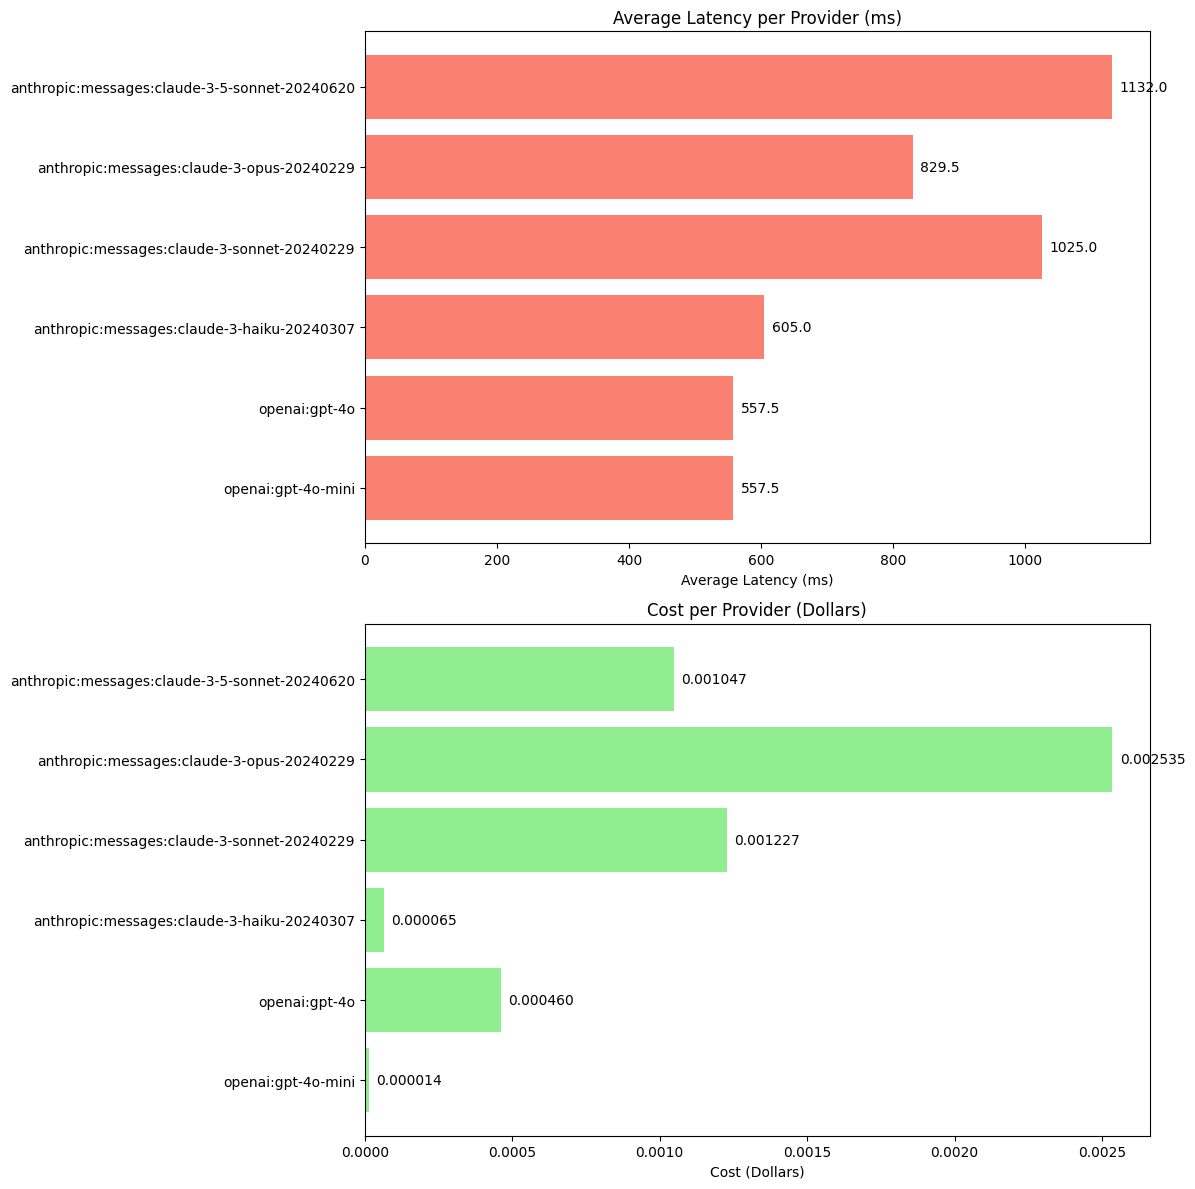

In [35]:
# Extract values for plotting
providers = [entry['provider'] for entry in extracted_data]
average_latencies = [entry['average_latency'] for entry in extracted_data]
costs = [entry['cost'] for entry in extracted_data]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

def add_labels_horizontal(ax, values, type):
    """Add labels on the end of each horizontal bar."""
    if type == 'latency':
        for i, value in enumerate(values):
            ax.text(value + max(values) * 0.01, i, f'{value}', va='center')
    elif type == 'cost':
        for i, value in enumerate(values):
            ax.text(value + max(values) * 0.01, i, f'{value:.6f}', va='center')
    else:
        raise ValueError(f"Invalid type: {type}")

# Plot Average Latency
axs[0].barh(providers, average_latencies, color='salmon')
axs[0].set_title('Average Latency per Provider (ms)')
axs[0].set_xlabel('Average Latency (ms)')
add_labels_horizontal(axs[0], average_latencies, 'latency')

# Plot Cost
axs[1].barh(providers, costs, color='lightgreen')
axs[1].set_title('Cost per Provider (Dollars)')
axs[1].set_xlabel('Cost (Dollars)')
add_labels_horizontal(axs[1], costs, 'cost')

# Adjust layout
plt.tight_layout()
plt.show()